### ENSF 544 Project 2

##### Yazan Chama 30060793


#### Imports

In [136]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


#### Exploring the 2019 World Happiness Dataset 

In [137]:
data = pd.read_csv("world_happiness_data_2019.csv")
print(f"The dataset has {data.shape[0]} samples and {data.shape[1]} columns")
data.head(156)

The dataset has 156 samples and 9 columns


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [138]:
print(f"The Country with highest score was {data.iloc[0]['Country or region']}, which had a score of {data.iloc[0]['Score']}")
print(f"The Country with lowest score was {data.iloc[-1]['Country or region']}, which had a score of {data.iloc[-1]['Score']}")


The Country with highest score was Finland, which had a score of 7.769
The Country with lowest score was South Sudan, which had a score of 2.853


In [139]:
data.describe()


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [140]:
print(f"The average score was {data.describe()['Score']['mean']}")

The average score was 5.407096153846155


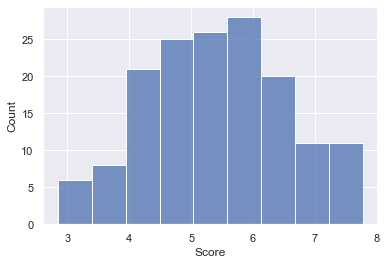

In [141]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

sns.histplot(data=data, x="Score")
plt.show()

#### Data Pre-processing

In [142]:
# Removing the `Overall Rank` column
data.drop(['Overall rank'], axis=1, inplace=True)

# Removing the `Country or region` column
data.drop(['Country or region'], axis=1, inplace=True)


# Checking for NaN values. It appears that there are no null values
print(data.isnull().any())



Score                           False
GDP per capita                  False
Social support                  False
Healthy life expectancy         False
Freedom to make life choices    False
Generosity                      False
Perceptions of corruption       False
dtype: bool


In [143]:
data.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298


<AxesSubplot: >

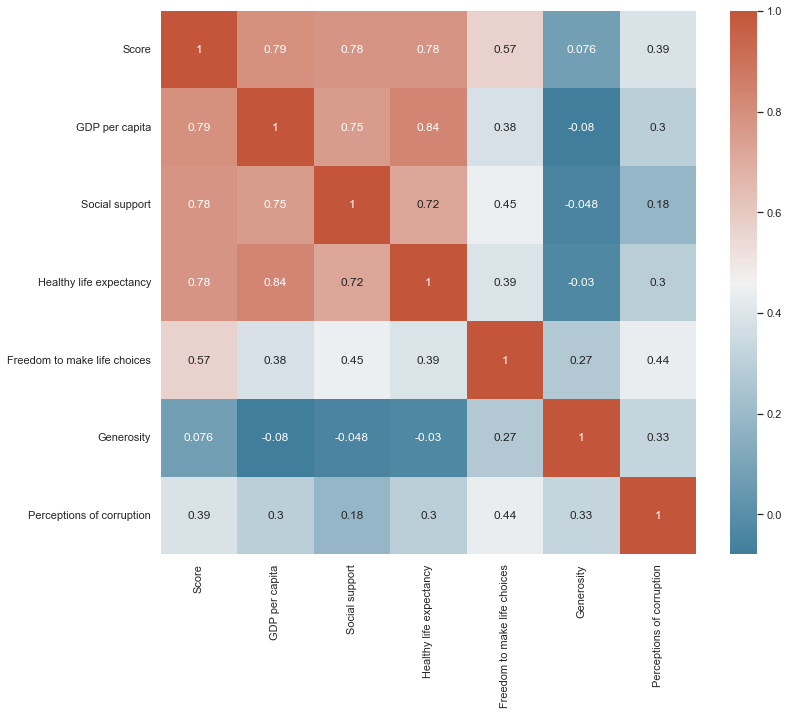

In [144]:
#
# Correlation between different variables
#
corr = data.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))

# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, cmap=cmap)

In [145]:
features = data.drop('Score', axis=1)
target = data['Score']

print(f"The shape of the features are {features.shape} and the shape of the target is {target.shape}")



The shape of the features are (156, 6) and the shape of the target is (156,)


In [146]:
# Splitting the data into training and test data

seed = 100
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed)

In [147]:
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = seed).fit(X_train, y_train)

score = rf.score(X_train, y_train)
print("R-squared:", score) 

prediction = rf.predict(X_test)

mse = mean_squared_error(y_test, prediction)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 






R-squared: 0.9322521737625453
MSE:  0.3080729237760941
RMSE:  0.15403646188804704


#### Improving the ML model

##### Finding the optimal depth

In [148]:
rf_max_depth_scores = {}



for maximum_depth in range(1, 15):

    if maximum_depth % 2 != 0:
        rf = RandomForestRegressor(n_estimators = 100, max_features = 1.0, max_depth = maximum_depth, random_state = seed).fit(X_train, y_train)

        score = rf.score(X_train, y_train) 

        prediction = rf.predict(X_test)

        mse = mean_squared_error(y_test, prediction)

        rf_max_depth_scores[maximum_depth] = (score, mse)


print (rf_max_depth_scores)

maximum_depth = 11





{1: (0.686168590663851, 0.5562048183979751), 3: (0.8813759058392654, 0.3577032388262253), 5: (0.9438816876273597, 0.321472521917038), 7: (0.9652720158708651, 0.32336203084956067), 9: (0.9694469741112504, 0.3356907520655875), 11: (0.969985753360059, 0.332134923878155), 13: (0.9697974178719562, 0.33337789983853794)}


In [149]:
rf = RandomForestRegressor(n_estimators = 100, max_features = 1.0, max_depth = maximum_depth, random_state = seed).fit(X_train, y_train)

score = rf.score(X_train, y_train) 

prediction = rf.predict(X_test)

mse = mean_squared_error(y_test, prediction)

print("When the maximum_depth=11\n")

print("R-squared:", score)
print("MSE: ", mse)

When the maximum_depth=11

R-squared: 0.969985753360059
MSE:  0.332134923878155


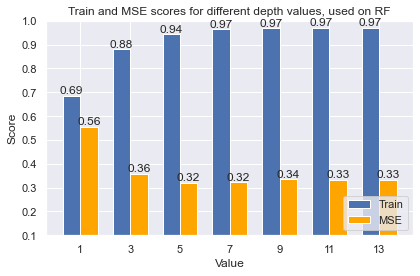

In [150]:

def plotKScores(df, title, yrange):
    fig, ax = plt.subplots()
    index = np.arange(len(df.columns))
    bar_width = 0.35

    plt.ylim(yrange)
    train_bar = plt.bar(index, df.iloc[0], bar_width, color='b', label='Train')
    test_bar = plt.bar(index + bar_width, df.iloc[1], bar_width, color='orange', label='MSE')


    plt.xlabel('Value')
    plt.ylabel('Score')
    plt.title(title)
    plt.xticks(index + bar_width/2, df.columns)
    plt.legend(loc="lower right")

    # From https://stackoverflow.com/questions/40489821/how-to-write-text-above-the-bars-on-a-bar-plot-python
    for rect in train_bar + test_bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

plotKScores(pd.DataFrame(rf_max_depth_scores), 'Train and MSE scores for different depth values, used on RF', (0.1, 1.0))


In [151]:
rf_estimators_scores = {}


for number_of_estimators in range(200, 225):

    if number_of_estimators % 2 != 0:
        rf = RandomForestRegressor(n_estimators = number_of_estimators, max_features = 1.0, max_depth = maximum_depth, random_state = seed).fit(X_train, y_train)

        score = rf.score(X_train, y_train) 

        prediction = rf.predict(X_test)

        mse = mean_squared_error(y_test, prediction)

        rf_estimators_scores[number_of_estimators] = (score, mse)

print (rf_estimators_scores)

number_of_estimators = 219


{201: (0.971404627901042, 0.32660061538270296), 203: (0.9712598851815122, 0.3265852069391091), 205: (0.9713514873420351, 0.32607293919199853), 207: (0.9712833650831245, 0.3262961876472759), 209: (0.9712262259521686, 0.3255381057840476), 211: (0.971122945194162, 0.32547797422202007), 213: (0.9711908916837273, 0.32517637580807857), 215: (0.9712342209966593, 0.32611550827804625), 217: (0.9712205896885671, 0.3263537399485845), 219: (0.9713290511674075, 0.3251766707962259), 221: (0.9714795479747576, 0.3263709328879194), 223: (0.9715351233572345, 0.32788188745963737)}


In [152]:
rf = RandomForestRegressor(n_estimators = number_of_estimators, max_features = 1.0, max_depth = maximum_depth, random_state = seed).fit(X_train, y_train)

score = rf.score(X_train, y_train) 

prediction = rf.predict(X_test)

mse = mean_squared_error(y_test, prediction)

print("When the number_of_estimators=219 and the maximum depth=11\n")

print("R-squared:", score)
print("MSE: ", mse)

When the number_of_estimators=219 and the maximum depth=11

R-squared: 0.9713290511674075
MSE:  0.3251766707962259


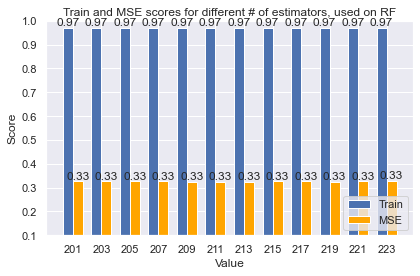

In [153]:
plotKScores(pd.DataFrame(rf_estimators_scores), 'Train and MSE scores for different # of estimators, used on RF', (0.1, 1.0))


In [154]:
rf = RandomForestRegressor(n_estimators = number_of_estimators, max_features = 'sqrt', max_depth = maximum_depth, random_state = seed).fit(X_train, y_train)

score = rf.score(X_train, y_train) 

prediction = rf.predict(X_test)

mse = mean_squared_error(y_test, prediction)

rf_estimators_scores[number_of_estimators] = (score, mse)

print("When the max_features=sqrt, number_of_estimators=219 and the maximum depth=11\n")

print("R-squared:", score)
print("MSE: ", mse)



When the max_features=sqrt, number_of_estimators=219 and the maximum depth=11

R-squared: 0.972645843210551
MSE:  0.2967244099386767


In [155]:
rf = RandomForestRegressor(n_estimators = number_of_estimators, max_features = 'log2', max_depth = maximum_depth, random_state = seed).fit(X_train, y_train)

score = rf.score(X_train, y_train) 

prediction = rf.predict(X_test)

mse = mean_squared_error(y_test, prediction)

rf_estimators_scores[number_of_estimators] = (score, mse)

print("When the max_features=log2,number_of_estimators=219 and the maximum depth=11\n")
print("R-squared:", score)
print("MSE: ", mse)

When the max_features=log2,number_of_estimators=219 and the maximum depth=11

R-squared: 0.972645843210551
MSE:  0.2967244099386767
